In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/House price/housing.csv')

print(df.head())
print(df.info())
print(df.describe())

   Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0   1  1360         5          4       3       1970  Downtown  Excellent   
1   2  4272         5          4       3       1958  Downtown  Excellent   
2   3  3592         2          2       3       1938  Downtown       Good   
3   4   966         4          2       2       1902  Suburban       Fair   
4   5  4926         1          4       2       1975  Downtown       Fair   

  Garage   Price  
0     No  149919  
1     No  424998  
2     No  266746  
3    Yes  244020  
4    Yes  636056  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Locat

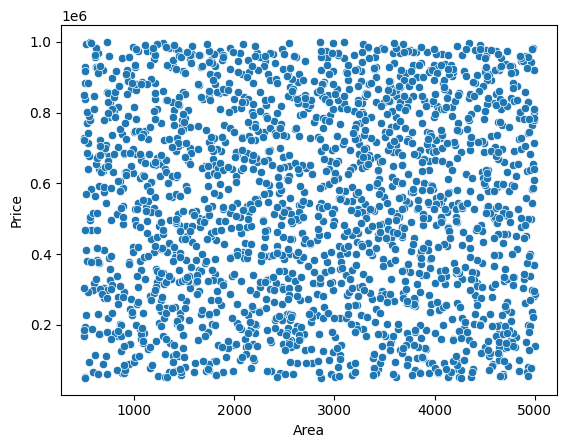

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Area', y='Price', data=df)

plt.show()


In [5]:
df = df.dropna()

In [6]:
df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)
df = pd.get_dummies(df, drop_first=True)

In [7]:
from sklearn.model_selection import train_test_split
x= df.drop('Price',axis=1)
y= df['Price']

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [11]:
from sklearn.metrics import mean_absolute_error, r2_score

predictions = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, predictions))
print("R2 Score:", r2_score(y_test, predictions))

MAE: 242867.44926338628
R2 Score: -0.006181784611834162


In [12]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

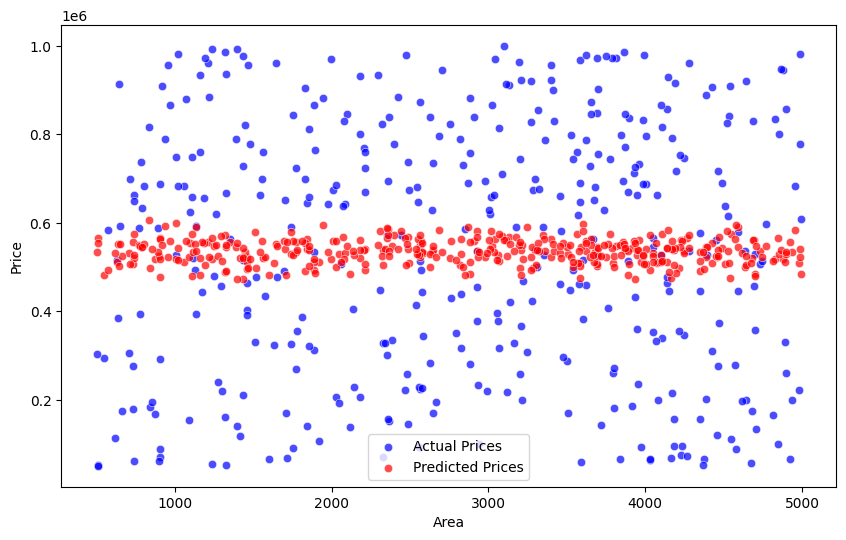

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Area'], y=y_test, label='Actual Prices', color='blue', alpha=0.7)
sns.scatterplot(x=X_test['Area'], y=predictions, label='Predicted Prices', color='red', alpha=0.7)


plt.show()